In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("NVidia_stock_history.csv", index_col=0)
data = data.iloc[:, :5]
data.index = pd.to_datetime(data.index, format="%Y/%m/%d")
data


,Open,High,Low,Close,Volume
Date,,,,,
1999-01-22,0.401941,0.448595,0.356484,0.376820,271468800.0
1999-01-25,0.406726,0.421081,0.376820,0.416296,51048000.0
1999-01-26,0.421081,0.429455,0.378016,0.383998,34320000.0
1999-01-27,0.385194,0.394764,0.363661,0.382801,24436800.0
1999-01-28,0.382801,0.385194,0.379212,0.381605,22752000.0
...,...,...,...,...,...
2021-11-08,301.489990,311.000000,299.070007,308.040009,50310100.0
2021-11-09,322.820007,323.100006,299.640015,306.570007,64674600.0
2021-11-10,293.559998,308.500000,287.779999,294.589996,63620600.0


In [3]:
data_model = data['Close']
print(data_model)


Date
1999-01-22      0.376820
1999-01-25      0.416296
1999-01-26      0.383998
1999-01-27      0.382801
1999-01-28      0.381605
                 ...    
2021-11-08    308.040009
2021-11-09    306.570007
2021-11-10    294.589996
2021-11-11    303.899994
2021-11-12    303.899994
Name: Close, Length: 5743, dtype: float64


<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'years')

Text(0, 0.5, 'stock price')

Text(0.5, 1.0, 'Nvidia stock price')

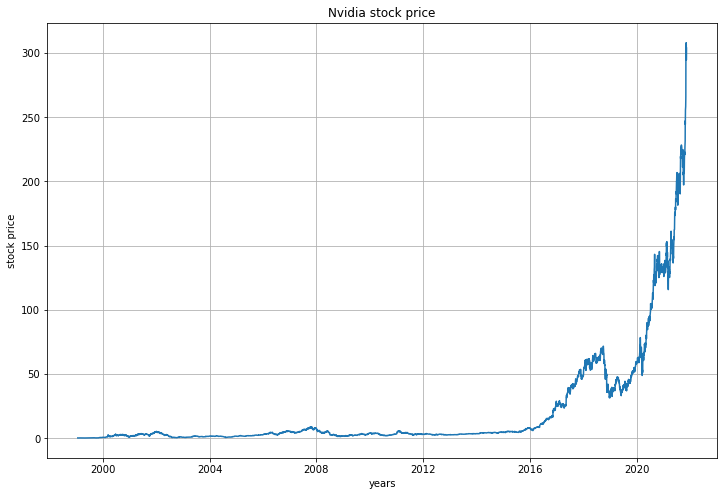

In [4]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(data_model)
plt.xlabel('years')
plt.ylabel('stock price')
plt.title("Nvidia stock price")
plt.show()


In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = sc.fit_transform(pd.DataFrame(data_model))
data_set_df = pd.DataFrame(
    data_set_scaled, index=data_model.index, columns=["value"])
data_set_df['value']


Date
1999-01-22    0.000206
1999-01-25    0.000334
1999-01-26    0.000229
1999-01-27    0.000225
1999-01-28    0.000222
                ...   
2021-11-08    1.000000
2021-11-09    0.995223
2021-11-10    0.956292
2021-11-11    0.986546
2021-11-12    0.986546
Name: value, Length: 5743, dtype: float64

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'years')

Text(0, 0.5, 'stock price')

Text(0.5, 1.0, 'Nvidia stock price')

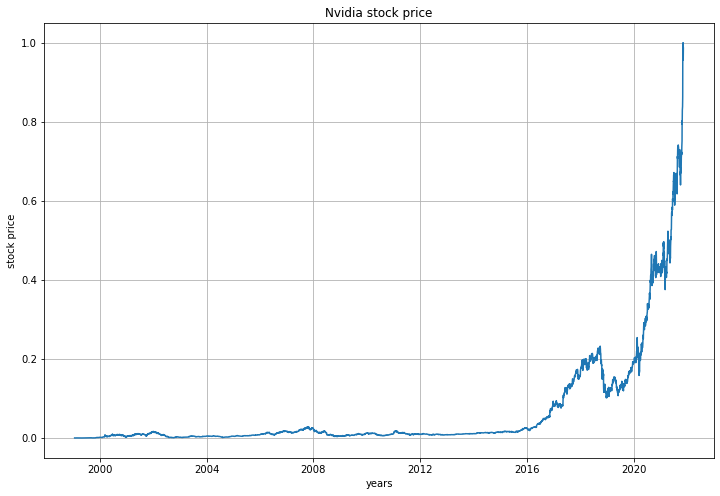

In [6]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.xlabel('years')
plt.ylabel('stock price')
plt.title("Nvidia stock price")
plt.plot(data_set_df['value'])

In [7]:
start_time = pd.to_datetime("2015/01/01", format="%Y/%m/%d")
data_set_df = data_set_df.loc[start_time:]
data_set_df.shape


(1730, 1)

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'years')

Text(0, 0.5, 'stock price')

Text(0.5, 1.0, 'Nvidia stock price')

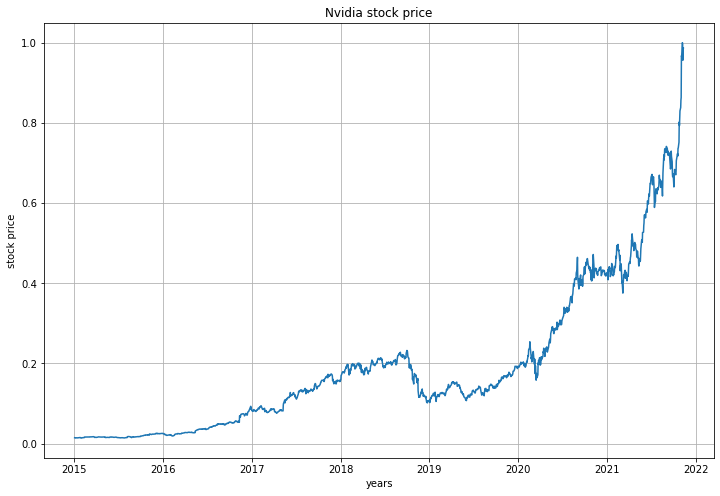

In [8]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(data_set_df)
plt.xlabel('years')
plt.ylabel('stock price')
plt.title("Nvidia stock price")
plt.show()


In [9]:
# initial training set
window = 5
timestamp = 100
amount_of_features = len(data_set_df.columns)

data = data_set_df.values
sequence_length = window + 1
sample = []

for index in range(len(data) - sequence_length):
    sample.append(data[index: index + sequence_length])
result = np.array(sample)

x = result[:-timestamp, :]
train_x = x[:, :-1]
train_y = x[:, -1][:, -1]
test_x = result[-timestamp:, :-1]
test_y = result[-timestamp:, -1][:, -1]
train_x = np.reshape(
    train_x, (train_x.shape[0], train_x.shape[1], amount_of_features))
test_x = np.reshape(
    test_x, (test_x.shape[0], test_x.shape[1], amount_of_features))


In [10]:
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x ", test_x.shape)
print("test_y ", test_y.shape)


train_x (1624, 5, 1)
train_y (1624,)
test_x  (100, 5, 1)
test_y  (100,)


In [11]:
# Building a function Recurrent Neural Network with Keras
# Dropout is being used to prevent overfitting

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [12]:
# parameters setting
epochs = 100
batch_size = 512


In [13]:
# Initialisation
# Adding layers and definig the model
# this model has 5 hidden layers

# Initialisation
reg = Sequential()

# Layer 1
reg.add(LSTM(units=200, return_sequences=True,
        input_shape=(train_x.shape[1], 1)))
reg.add(Dropout(0.2))
# Layer 2
reg = Sequential()
reg.add(LSTM(units=200, return_sequences=True))
reg.add(Dropout(0.2))
# Layer 3
reg = Sequential()
reg.add(LSTM(units=100, return_sequences=True))
reg.add(Dropout(0.2))
# Layer 4
reg = Sequential()
reg.add(LSTM(units=100, return_sequences=True))
reg.add(Dropout(0.2))
# Layer 5
reg = Sequential()
reg.add(LSTM(units=100))
reg.add(Dropout(0.2))
reg.add(Dense(4))
# Final Output layer
reg.add(Dense(units=1, activation='relu'))


In [14]:
# Compiling our neural network by choosing our loss functions and optimizer
# Adam optimizer
reg.compile(optimizer='adam', loss='mse')

In [15]:
# Training the model on the training data
history = reg.fit(x=train_x, y=train_y, epochs=epochs,
        batch_size=batch_size, validation_data=(test_x, test_y))


Epoch 1/100
4/4 [==============================] - 4s 105ms/step - loss: 0.0377 - val_loss: 0.2929
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0151 - val_loss: 0.1085
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0073 - val_loss: 0.0278
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0080 - val_loss: 0.0167
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0049 - val_loss: 0.0242
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0282
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 0.0186
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 4.8951e-04 - val_loss: 0.0015
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 5.1768e-04 - val_loss: 0.0061
Epoch 11/1

<Figure size 576x864 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

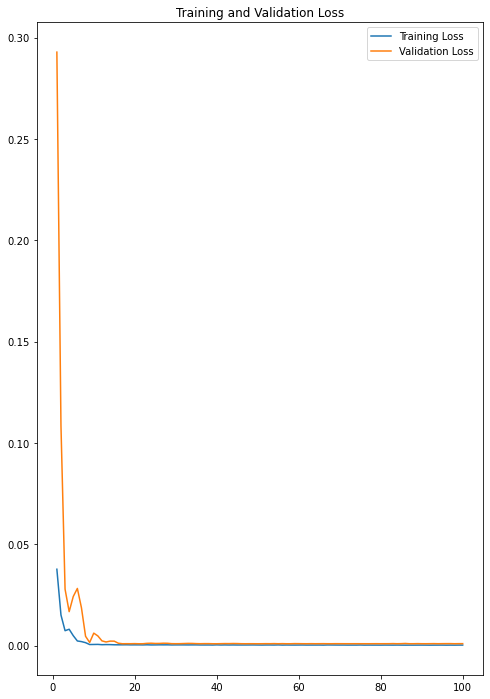

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8,12))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
train_y_predict = reg.predict(train_x)[:, 0]


In [18]:
train_y_ori = sc.inverse_transform(
    train_y.reshape(-1, 1)).reshape(train_y.shape)
train_y_predict_ori = sc.inverse_transform(
    train_y_predict.reshape(-1, 1)).reshape(train_y_predict.shape)


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Train Data')

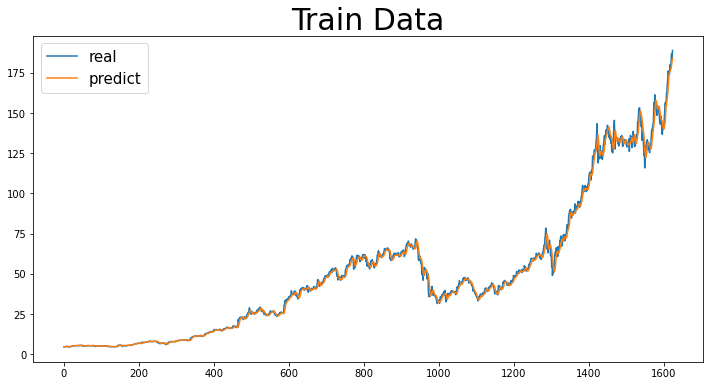

In [19]:
draw = pd.concat([pd.DataFrame(train_y_ori),
                 pd.DataFrame(train_y_predict_ori)], axis=1)
draw.iloc[:, 0].plot(figsize=(12, 6))
draw.iloc[:, 1].plot(figsize=(12, 6))
plt.legend(('real', 'predict'), loc='upper left', fontsize='15')
plt.title("Train Data", fontsize='30')


In [20]:
test_y_predict = reg.predict(test_x)[:, 0]


In [21]:
test_y_ori = sc.inverse_transform(test_y.reshape(-1, 1)).reshape(test_y.shape)
test_y_predict_ori = sc.inverse_transform(
    test_y_predict.reshape(-1, 1)).reshape(test_y_predict.shape)


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Test Data')

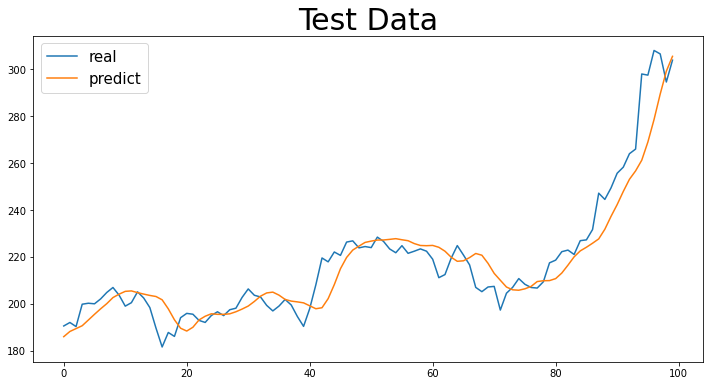

In [22]:
draw = pd.concat(
    [pd.DataFrame(test_y_ori), pd.DataFrame(test_y_predict_ori)], axis=1)
draw.iloc[:, 0].plot(figsize=(12, 6))
draw.iloc[:, 1].plot(figsize=(12, 6))
plt.legend(('real', 'predict'), loc='upper left', fontsize='15')
plt.title("Test Data", fontsize='30')


In [23]:
# Root mean squared error
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse = math.sqrt(mean_squared_error(test_y_ori, test_y_predict_ori))
mae = mean_absolute_error(test_y_ori, test_y_predict_ori)
print(mean_squared_error(test_y_ori, test_y_predict_ori))
print(rmse)
print(mae)

87.46662711801939
9.352359441232966
6.668003540039063


In [24]:
print(window)
print(len(loss))
print(rmse)
df = pd.DataFrame([loss,val_loss],index=["loss","val_loss"]).T
filename = "window"+ str(window) + "epochs" + str(len(loss)) + ".csv"
# df.to_csv("result/"+filename+"", index=False, sep=',')

5
100
9.352359441232966
